In [32]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from pathlib import Path
import matplotlib.pyplot as plt

In [22]:
DATA_PATH = "Леденцы.dat"

In [23]:
df = pd.read_csv(DATA_PATH, sep=None, engine="python", encoding="utf-8")
imp = SimpleImputer(strategy="median")
X = imp.fit_transform(df)
X = StandardScaler().fit_transform(X)

In [24]:
Z = linkage(X, method="ward")

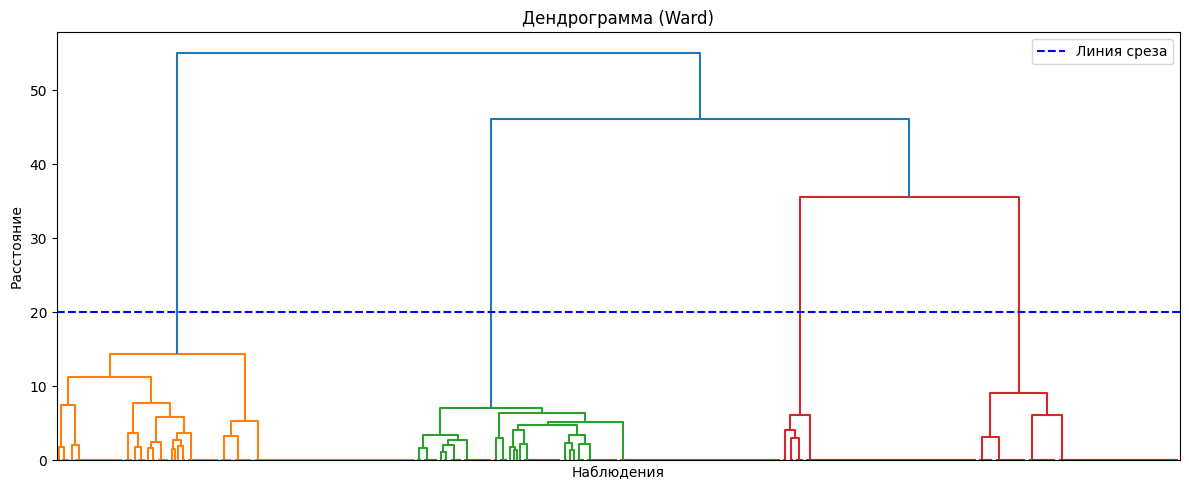

In [51]:
plt.figure(figsize=(12, 5))
dendrogram(
    Z,
    no_labels=True,
    count_sort=True
)
plt.title("Дендрограмма (Ward)")
plt.xlabel("Наблюдения")
plt.ylabel("Расстояние")
CUT_HEIGHT = 20.0
plt.axhline(cut_height, linestyle="--", label='Линия среза', c='b')
plt.tight_layout()
plt.legend()
plt.show()

In [55]:
labels = fcluster(Z, t=CUT_HEIGHT, criterion="distance")

In [56]:
df_l = df.copy()
df_l["cluster"] = labels
profile_means = df_l.groupby("cluster").mean(numeric_only=True)

In [57]:
df_l.to_csv("candy_hclust_k_from_dendro.csv", index=False)

In [60]:
print("Количество кластеров:", len(np.unique(labels)))
print("Размеры кластеров:", df_l["cluster"].value_counts().sort_index().to_dict())
print("Средние признаков:")
profile_means.round(2)

Количество кластеров: 4
Размеры кластеров: {1: 108, 2: 110, 3: 59, 4: 61}
Средние признаков:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.82,2.83,2.77,2.62,2.61,2.58,2.75,2.92,4.95,4.81,4.86
2,4.85,4.80,4.84,4.68,3.04,3.04,3.00,2.99,3.07,3.05,3.05
3,3.00,2.97,2.97,2.92,2.92,2.95,4.92,4.92,3.00,3.00,3.00
4,3.00,3.00,3.00,3.00,4.85,4.85,3.00,2.92,2.75,2.75,2.75


**Теперь про классификацию потребителей по потребностям. Средние по признакам сильно различны в зависимости от кластера, причем различие очень четкое. Можно заметить, что второй кластер использует леденцы для повышения свежести и уверенности, первый кластер - для улучшения самочувствия и подавления симптомов болезней, четвертый - заменяет сладкое леденцами, а третий - для улучшения когнитивных способностей.**